<a href="https://colab.research.google.com/github/cloudui/ml-by-example/blob/main/ch3/kernel_SVM_custom_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
# Imagine stacking the tuples by column instead of row
X = np.c_[
          (.3, -.8),
          (-1.5, -1),
          (-1.3, -.8),
          (-1.1, -1.3),
          (-1.2, -.3),
          (-1.3, -.5),
          (-.6, 1.1),
          (-1.4, 2.2),
          (1, 1),
          # positive class
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (0.5, -2.4),
          (0.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [-1] * 8 + [1] * 8

In [3]:
gamma_option = [1, 2, 4]

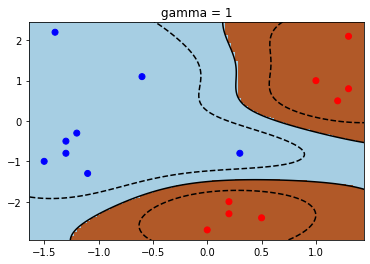

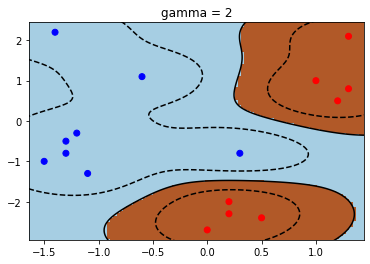

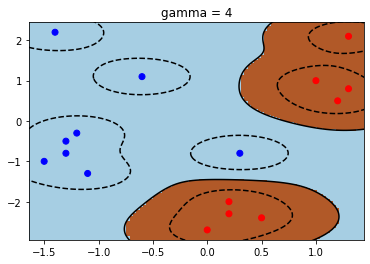

In [4]:
for i, gamma in enumerate(gamma_option, 1):
  # RBF kernel SVM on selected data from above
  svm = SVC(kernel='rbf', gamma=gamma)
  # Train the model
  svm.fit(X, Y)

  plt.scatter(X[:, 0], X[:, 1], c=['b']*8+['r']*8,
              zorder=10, cmap=plt.cm.Paired)
  plt.axis('tight')
  # mgrid returns two 2D arrays, where each (XX, YY) forms a pair within
  # the range specified
  XX, YY = np.mgrid[-3:3:200j, -3:3:200j]
  # Evaluating the trained model on a bunch of evenly spaced out points
  # within the meshgrid's range
  Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])
  # shape output 1 x n^2 matrix to to n x n
  Z = Z.reshape(XX.shape)

  # 
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
              linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
  plt.title('gamma = %d' % gamma)
  plt.show()